This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = '' # personal API key removed for security

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to use Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests as r
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
quandl_FSE_EON = 'https://www.quandl.com/api/v3/datasets/FSE/EON_X?start_date=2019-11-08&end_date=2019-11-08&api_key='

sample = r.get(quandl_FSE_EON + API_KEY)

print(sample.text)

{"dataset":{"id":36592406,"dataset_code":"EON_X","database_code":"FSE","name":"E.on Se (EON_X)","description":"Stock Prices for E.on Se (2019-10-28) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE000ENAG999","refreshed_at":"2019-11-11T22:20:41.476Z","newest_available_date":"2019-11-11","oldest_available_date":"2003-01-20","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2019-11-08","end_date":"2019-11-08","data":[["2019-11-08",8.91,8.986,8.872,8.872,null,10621516.0,94493864.0,null,null,null]],"collapse":null,"order":null,"database_id":6129}}


In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
print(json.dumps(sample.json(), indent=2, sort_keys=True))

{
  "dataset": {
    "collapse": null,
    "column_index": null,
    "column_names": [
      "Date",
      "Open",
      "High",
      "Low",
      "Close",
      "Change",
      "Traded Volume",
      "Turnover",
      "Last Price of the Day",
      "Daily Traded Units",
      "Daily Turnover"
    ],
    "data": [
      [
        "2019-11-08",
        8.91,
        8.986,
        8.872,
        8.872,
        null,
        10621516.0,
        94493864.0,
        null,
        null,
        null
      ]
    ],
    "database_code": "FSE",
    "database_id": 6129,
    "dataset_code": "EON_X",
    "description": "Stock Prices for E.on Se (2019-10-28) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE000ENAG999",
    "end_date": "2019-11-08",
    "frequency": "daily",
    "id": 36592406,
    "limit": null,
    "name": "E.on Se (EON_X)",
    "newest_available_date": "2019-11-11",
    "oldest_available_date": "2003-01-20",
    "order": null,
    "premium": false,

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [5]:
# Problem 1: Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017
# (keep in mind that the date format is YYYY-MM-DD)

quandl_FSE_AFX = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-01&end_date=2017-12-31&api_key='

# Request the Quandl data through the API
fse_afx_2017 = r.get(quandl_FSE_AFX + API_KEY)

print(fse_afx_2017.text)

{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2019-10-28) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2019-11-11T22:20:41.213Z","newest_available_date":"2019-11-11","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2017-01-01","end_date":"2017-12-31","data":[["2017-12-29",51.76,51.94,51.45,51.76,null,34640.0,1792304.0,null,null,null],["2017-12-28",51.65,51.82,51.43,51.6,null,40660.0,2099024.0,null,null,null],["2017-12-27",51.45,51.89,50.76,51.82,null,57452.0,2957018.0,null,null,null],["2017-12-22",51.05,51.5,50.92,51.32,

In [6]:
# Problem 2: Convert the returned JSON object into a Python dictionary.

dict_fse_2017 = fse_afx_2017.json()

In [7]:
# Problem 3: Calculate what the highest and lowest opening prices were for the stock in this period.

df_fse_2017 = pd.DataFrame(dict_fse_2017['dataset']['data'], \
                          columns = dict_fse_2017['dataset']['column_names']).set_index('Date')

df_fse_2017_max = df_fse_2017.Open.max()
df_fse_2017_min = df_fse_2017.Open.min()

print(f'Highest opening price: ${df_fse_2017_max:.2f} \n' +\
      f'Lowest opening price: ${df_fse_2017_min:.2f}')

Highest opening price: $53.11 
Lowest opening price: $34.00


In [8]:
# Problem 4: What was the largest change in any one day (based on High and Low price)?

max_delta = max(df_fse_2017.High - df_fse_2017.Low)

print(f'Largest change in any one day: ${max_delta:.2f}')

Largest change in any one day: $2.81


In [9]:
# Problem 5: What was the largest change between any two days (based on Closing Price)?

closing_prices = df_fse_2017.Close.reset_index()

# create column with closing prices, lag of 1 & 2
closing_prices['price_lag_1'] = closing_prices.Close.shift(periods = 1)
closing_prices['price_lag_2'] = closing_prices.Close.shift(periods = 2)

# Determine if the lag 1 & 2 closing price is one or two days away from the day's closing price
closing_prices['date_lag_1'] = abs(pd.to_datetime(closing_prices.Date) - \
                                 pd.to_datetime(closing_prices.Date.shift(periods = 1))) == pd.Timedelta('1 day')
closing_prices['date_lag_2'] = abs(pd.to_datetime(closing_prices.Date) - \
                                 pd.to_datetime(closing_prices.Date.shift(periods = 2))) == pd.Timedelta('2 day')

# Determine the change in closing price between one or two days
closing_prices['lag_1'] = np.where(closing_prices.date_lag_1 == True,\
                                  abs(closing_prices.price_lag_1 - closing_prices.Close), np.nan)
closing_prices['lag_2'] = np.where(closing_prices.date_lag_2 == True,\
                                  abs(closing_prices.price_lag_2 - closing_prices.Close), np.nan)
max_change = max(closing_prices.lag_1.max(), closing_prices.lag_2.max())

print(f'The largest change between any two days, based on closing price is: ${max_change:.2f}')

The largest change between any two days, based on closing price is: $3.15


In [10]:
# Problem 6: What was the average daily trading volume during this year?

avg_daily_trade = round(df_fse_2017['Traded Volume'].mean(),2)

print(f'Average daily trading volume during 2017: {avg_daily_trade:.2f}')

Average daily trading volume during 2017: 89124.34


The median trading volume during 2017 is 76286.0


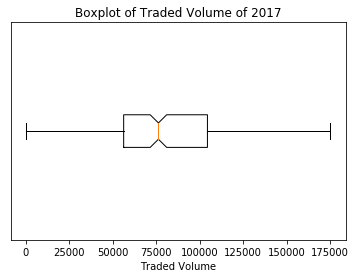

In [11]:
# Problem 7: (Optional) What was the median trading volume during this year.
# (Note: you may need to implement your own function for calculating the median.)

# Create sorted DataFrame to be plotted for the Traded Volume in 2017
df_sorted_vol = df_fse_2017['Traded Volume'].reset_index().sort_values(['Traded Volume'])['Traded Volume']

# Create boxplot for Traded Volume
fig, ax = plt.subplots()

# Customize title and axes
ax.set_title('Boxplot of Traded Volume of 2017')
ax.axes.get_yaxis().set_visible(False)
ax.set_xlabel('Traded Volume')

# Plot Traded Volume boxplot, only showing between 25th and 75th percentile for ease of viewing
trade_plot = ax.boxplot(df_sorted_vol, showfliers = False, notch = True, vert = False)

# Get median trading volume for 2017
median_2017 = trade_plot['medians'][0].get_xdata()[0]
print(f'The median trading volume during 2017 is {median_2017}')